In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Enable inline plotting
%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv("Unemp_India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
# Check for nulls and data types
print(df.info())
print(df.isnull().sum())

# Strip extra spaces in column names
df.columns = df.columns.str.strip()

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Drop rows with missing values
df = df.dropna()

# Preview cleaned data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated 

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
# Add Month and Year columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

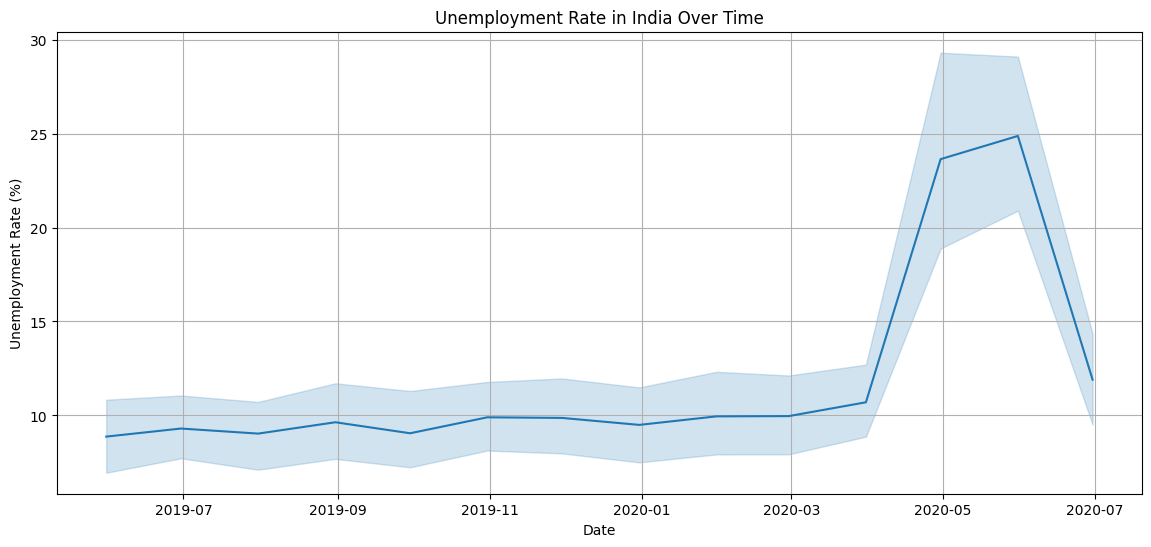

In [5]:
# Line plot of Unemployment Rate over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()

In [6]:
# Interactive plot of unemployment by region
fig = px.line(df, x='Date', y='Estimated Unemployment Rate (%)', color='Region',
              title='Unemployment Rate by Region (Interactive)', template='plotly_white')
fig.show()

In [7]:
# Covid period analysis (March 2020 - Dec 2021)
covid_period = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2021-12-31')]
pre_covid = df[df['Date'] < '2020-03-01']

# Compare average unemployment rate
pre_avg = pre_covid['Estimated Unemployment Rate (%)'].mean()
covid_avg = covid_period['Estimated Unemployment Rate (%)'].mean()

print("Pre-Covid Average Unemployment Rate: {:.2f}%".format(pre_avg))
print("Covid Period Average Unemployment Rate: {:.2f}%".format(covid_avg))


Pre-Covid Average Unemployment Rate: 9.51%
Covid Period Average Unemployment Rate: 17.77%


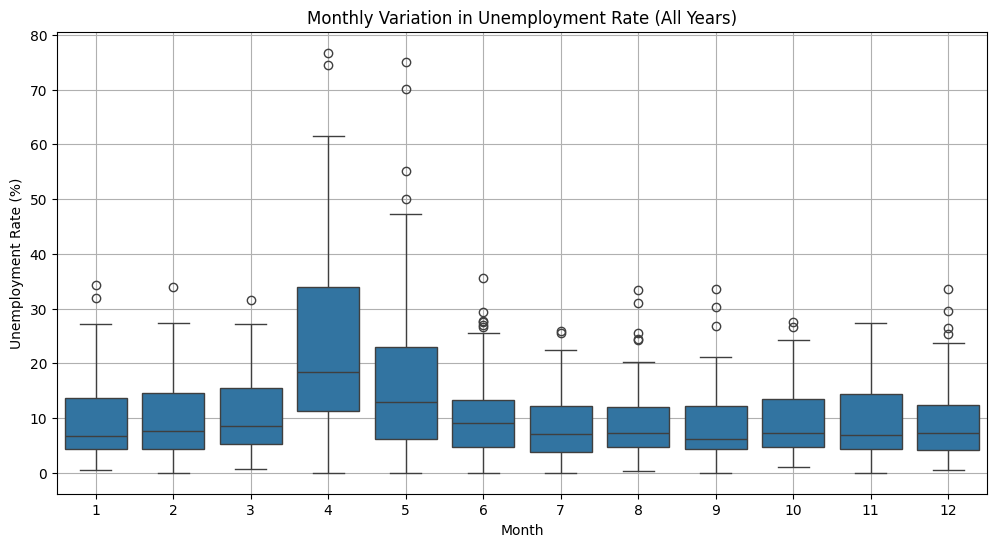

In [8]:
# Seasonal Trend - Boxplot by Month
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Estimated Unemployment Rate (%)', data=df)
plt.title("Monthly Variation in Unemployment Rate (All Years)")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()